## nfl-data-py repo
https://github.com/nflverse/nfl_data_py/issues/122

https://pypi.org/project/nfl-data-py/#description

In [1]:
import random
random.seed(42)
import pandas as pd
import numpy as np
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import nfl_data_py as nfl
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import gspread

In [3]:
# import requests
# import pandas as pd

# # URL of the ESPN page containing the tables
# url = 'https://www.espn.com/college-football/stats/player/_/stat/receiving/season/2017/table/receiving/sort/receivingTouchdowns/dir/desc'

# # Fetch the webpage content
# response = requests.get(url)
# response.raise_for_status()  # Ensure the request was successful

# # Parse all tables in the HTML content
# tables = pd.read_html(response.text)

# # Display the number of tables found
# print(f"Number of tables found: {len(tables)}")

# # Iterate through the tables and display their content
# for i, table in enumerate(tables):
#     print(f"\nTable {i + 1}:")
#     print(table.head())  # Display the first few rows of each table


In [2]:
# nfl.import_pbp_data(years, columns, downcast=True, cache=False, alt_path=None)
year = 2022
season_yr = [year]
nfl_play_by_play = nfl.import_pbp_data(season_yr, downcast=True)

nfl_play_by_play['seconds_remaining_after_play'] = nfl_play_by_play['game_seconds_remaining'].shift(-1)
nfl_play_by_play['seconds_remaining_after_play'] = nfl_play_by_play['seconds_remaining_after_play'].fillna(0)
nfl_play_by_play['seconds_elapsed'] = nfl_play_by_play['game_seconds_remaining'] - nfl_play_by_play['seconds_remaining_after_play']


nfl_play_by_play.head(1)


# avg(ydsnet) group by play_type, eventually add by position 
## if pass: passer_player_id	& receiver_player_id
## if rush: rusher_player_id
### To simplify backing out RB/QB/WR, check if the player getting rushing yards matches the passer id ocurring in majority of game

2022 done.
Downcasting floats.


/var/folders/yp/kr9l6lcd36l93rcwhv5n5b0h0000gn/T/ipykernel_67546/3958744097.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nfl_play_by_play['seconds_remaining_after_play'] = nfl_play_by_play['game_seconds_remaining'].shift(-1)
/var/folders/yp/kr9l6lcd36l93rcwhv5n5b0h0000gn/T/ipykernel_67546/3958744097.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nfl_play_by_play['seconds_elapsed'] = nfl_play_by_play['game_seconds_remaining'] - nfl_play_by_play['seconds_remaining_after_play']


,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,td_player_name,td_player_id,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name,rushing_yards,lateral_receiver_player_id,lateral_receiver_player_name,lateral_receiving_yards,lateral_rusher_player_id,lateral_rusher_player_name,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tack

In [5]:
fumble_plays = nfl_play_by_play[nfl_play_by_play['desc'].str.contains('fumble', case=False, na=False)]
# fumble_plays['desc'].iloc[0]
fumble_plays.head(1)

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,td_player_name,td_player_id,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name,rushing_yards,lateral_receiver_player_id,lateral_receiver_player_name,lateral_receiving_yards,lateral_rusher_player_id,lateral_rusher_player_name,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tack

In [6]:
fumble_plays['desc'].iloc[4]

'(13:46) (Shotgun) 9-M.Stafford to LA 11 for -6 yards. FUMBLES, and recovers at LA 11. 9-M.Stafford sacked at LA 10 for -7 yards (50-G.Rousseau).'

In [7]:
nfl_play_by_play['desc'][(nfl_play_by_play['game_id']=='2022_02_CAR_NYG') & (nfl_play_by_play['play_id']==1479)].iloc[0]
# nfl_play_by_play[(nfl_play_by_play['game_id']=='2022_02_CAR_NYG') & (nfl_play_by_play['play_type_nfl']=='PUNT')].head()

'(5:28) 6-J.Gillan punts 47 yards to CAR 38, Center-58-C.Kreiter. 12-S.Smith to CAR 47 for 9 yards (85-C.Myarick). CAR-12-S.Smith was injured during the play. PENALTY on NYG-31-M.Breida, Player Out of Bounds on Kick, 5 yards, enforced at CAR 47.'

In [8]:
nfl_play_by_play['desc'][(nfl_play_by_play['play_type'] == 'kickoff') & (nfl_play_by_play['fumble_lost'] == 1)].iloc[1]

'19-M.Wright kicks 67 yards from KC 35 to TB -2. 29-R.White to TB 23 for 25 yards (43-J.Cochrane, 29-C.Lammons). FUMBLES (29-C.Lammons), RECOVERED by KC-44-E.Lee at TB 21.'

In [3]:
run_and_pass_nfl = nfl_play_by_play[nfl_play_by_play["play_type"].isin(["pass", "run"])].copy()
run_and_pass_nfl.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,td_player_name,td_player_id,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name,rushing_yards,lateral_receiver_player_id,lateral_receiver_player_name,lateral_receiving_yards,lateral_rusher_player_id,lateral_rusher_player_name,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tack

In [4]:
run_and_pass_nfl = nfl_play_by_play[nfl_play_by_play["play_type"].isin(["pass", "run","no_play"])].copy()
# run_and_pass_nfl = nfl_play_by_play.copy()

off_yards = (
    run_and_pass_nfl.groupby(['play_type'])
    .agg({
        'yards_gained' : ['mean','median','std','sum','count'],
        'touchdown': 'sum',
        'fumble_lost': 'sum',
        'first_down': 'mean',
        'seconds_elapsed':'mean'
    })
)

# Flatten MultiIndex columns
off_yards.columns = [
    'yards_pp', 'yards_pp_med', 'yards_pp_std',
    'yards_tot', 'plays_tot',
    'tds_tot', 'fum_lost', 'first_down_pct',
    'seconds_pp'
]

off_yards.reset_index(inplace=True)

tds_tot = off_yards['tds_tot'].sum()
off_yards['td_pct_total'] = off_yards['tds_tot'] / tds_tot

yards_tot = off_yards['yards_tot'].sum()
off_yards['yards_pct_total'] = off_yards['yards_tot'] / yards_tot

off_yards['td_rate'] = off_yards['tds_tot'] / off_yards['plays_tot']
off_yards['fum_rate'] = off_yards['fum_lost'] / off_yards['plays_tot']


cln_title = ['play_type','yards_pp','tds_tot','yards_tot','plays_tot','td_rate','td_pct_total','yards_pct_total','yards_pp_med','yards_pp_std','fum_lost','fum_rate','first_down_pct','seconds_pp']

off_yards_nice_cols = off_yards[cln_title]
off_yards_nice_cols.sort_values(by='yards_tot',ascending=False,inplace=True)
off_yards_nice_cols.head(10)

,play_type,yards_pp,tds_tot,yards_tot,plays_tot,td_rate,td_pct_total,yards_pct_total,yards_pp_med,yards_pp_std,fum_lost,fum_rate,first_down_pct,seconds_pp
1,pass,6.105919,848.0,124518.0,20393,0.041583,0.616279,0.642372,4.0,9.740219,166.0,0.008140,0.317658,22.151768
2,run,4.610162,528.0,69323.0,15037,0.035113,0.383721,0.357628,3.0,6.356112,96.0,0.006384,0.264215,33.715302
0,no_play,0.000000,0.0,0.0,4519,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.149812,6.230550


In [7]:
seconds_elapsed_df = nfl_play_by_play.copy()


first_dwns = (
    seconds_elapsed_df.groupby(['play_type'])
    .agg({
        'seconds_elapsed':['mean','std','median','count'],
        'yards_gained':['mean','std','median'],
        'penalty_yards':['mean','std','median'],
        'kick_distance': ['mean','median','std'],
        'return_yards': ['mean', 'median', 'std']
    })
)

first_dwns.columns = [
        'sec_pp','sec_pp_std','sec_pp_median','tot_plays',
        'yards_pp','yards_pp_std','yards_pp_med',
        'pen_yards_pp','pen_yards_std','pen_yards_med',
        'kick_yds_pp', 'kick_yds_med', 'kick_yds_std',
        'return_yds_pp', 'return_yds_med', 'return_yds_std'
        ]

first_dwns.reset_index(inplace=True)
first_dwns.sort_values(by='tot_plays',ascending=False,inplace=True)

total_plays_sum = first_dwns['tot_plays'].sum()
first_dwns['plays_pct_tot'] = first_dwns['tot_plays'] / total_plays_sum

## should consider calculating a penalty function that triggers randomly
#### get variety of penalty yardage depending on the play type, default to historic data
### right now what is being used is OK

## get FG rate by yardage
# how wouold probability work for deciding when to go for a kick/when not?
first_dwns.head(10)

,play_type,sec_pp,sec_pp_std,sec_pp_median,tot_plays,yards_pp,yards_pp_std,yards_pp_med,pen_yards_pp,pen_yards_std,pen_yards_med,kick_yds_pp,kick_yds_med,kick_yds_std,return_yds_pp,return_yds_med,return_yds_std,plays_pct_tot
4,pass,22.151768,16.363258,22.0,20393,6.105919,9.740219,4.0,12.141701,4.257008,15.0,NaN,NaN,NaN,0.271564,0.0,3.029896,0.424987
8,run,33.715302,12.035015,38.0,15037,4.610162,6.356112,3.0,9.747863,4.223440,10.0,NaN,NaN,NaN,0.000000,0.0,0.000000,0.313369
3,no_play,6.230550,9.590606,0.0,4563,0.000000,0.000000,0.0,7.494339,5.506028,5.0,NaN,NaN,NaN,0.000000,0.0,0.000000,0.095092
2,kickoff,2.169312,2.927538,0.0,2835,0.000000,0.000000,0.0,9.103093,2.859504,10.0,62.397179,65.0,9.221281,8.667372,0.0,13.152803,0.059081
5,punt,9.467742,2.359262,9.0,2294,0.000000,0.000000,0.0,9.426901,3.567695,10.0,46.695293,47.0,9.985599,3.878814,0.0,7.125145,0.047807
0,extra_point,0.000000,0.000000,0.0,1253,0.000000,0.000000,0.0,10.333333,5.163978,15.0,33.071827,33.0,0.744273,0.000000,0.0,0.000000,0.026112
1,field_goal,4.039819,1.031325,4.0,1105,0.000000,0.000000,0.0,15.000000,0.000000,15.0,39.177376,39.0,10.629005,0.000000,0.0,0.000000,0.023028
6,qb_kneel,25.712669,13.502373,29.0,442,-1.063348,0.559856,-1.0,15.000000,NaN,15.0,NaN,NaN,NaN,0.000000,0.0,0.000000,0.009211
7,qb_spike,0.968254,0.176731,1.0,63,0.000000,0.000000,0.0,10.000000,NaN,10.0,NaN,NaN,NaN,0.000000,0.0,0.000000,0.001313


In [8]:
import pandas as pd
import numpy as np

# Create a copy to avoid modifying the original
condensed_df = first_dwns.copy()

# Apply conditional logic for each row
condensed_df['yards_pp'] = np.where(
    condensed_df['play_type'].isin(['kickoff', 'punt', 'extra_point','field_goal']),
    condensed_df['kick_yds_pp'],
    np.where(
        condensed_df['play_type'] == 'no_play',
        condensed_df['pen_yards_pp'],
        condensed_df['yards_pp']
    )
)

condensed_df['yards_pp_std'] = np.where(
    condensed_df['play_type'].isin(['kickoff', 'punt', 'extra_point','field_goal']),
    condensed_df['kick_yds_std'],
    np.where(
        condensed_df['play_type'] == 'no_play',
        condensed_df['pen_yards_std'],
        condensed_df['yards_pp_std']
    )
)

condensed_df['yards_pp_med'] = np.where(
    condensed_df['play_type'].isin(['kickoff', 'punt', 'extra_point','field_goal']),
    condensed_df['kick_yds_med'],
    np.where(
        condensed_df['play_type'] == 'no_play',
        condensed_df['pen_yards_med'],
        condensed_df['yards_pp_med']
    )
)

# Now, keep only the required columns
condensed_df = condensed_df[[
    'play_type', 'sec_pp', 'sec_pp_std', 'sec_pp_median',
    'yards_pp', 'yards_pp_std', 'yards_pp_med', 'plays_pct_tot'
]]

condensed_yardage_df = condensed_df.copy()
display(condensed_yardage_df)

,play_type,sec_pp,sec_pp_std,sec_pp_median,yards_pp,yards_pp_std,yards_pp_med,plays_pct_tot
4,pass,22.151768,16.363258,22.0,6.105919,9.740219,4.0,0.424987
8,run,33.715302,12.035015,38.0,4.610162,6.356112,3.0,0.313369
3,no_play,6.230550,9.590606,0.0,7.494339,5.506028,5.0,0.095092
2,kickoff,2.169312,2.927538,0.0,62.397179,9.221281,65.0,0.059081
5,punt,9.467742,2.359262,9.0,46.695293,9.985599,47.0,0.047807
0,extra_point,0.000000,0.000000,0.0,33.071827,0.744273,33.0,0.026112
1,field_goal,4.039819,1.031325,4.0,39.177376,10.629005,39.0,0.023028
6,qb_kneel,25.712669,13.502373,29.0,-1.063348,0.559856,-1.0,0.009211
7,qb_spike,0.968254,0.176731,1.0,0.000000,0.000000,0.0,0.001313


In [7]:
# first_dwns.play_type.unique()
first_dwns.columns

Index(['play_type', 'sec_pp', 'sec_pp_std', 'sec_pp_median', 'tot_plays',
       'yards_pp', 'yards_pp_std', 'yards_pp_med', 'pen_yards_pp',
       'pen_yards_std', 'pen_yards_med', 'kick_yds_pp', 'kick_yds_med',
       'kick_yds_std', 'return_yds_pp', 'return_yds_med', 'return_yds_std',
       'plays_pct_tot'],
      dtype='object')

In [9]:
first_dwns['simulated_sec_pp'] = np.random.normal(loc=first_dwns['sec_pp'], scale=first_dwns['sec_pp_std'])
condensed_yardage_df['simulated_sec_pp'] = np.random.normal(loc=condensed_yardage_df['sec_pp'], scale=condensed_yardage_df['sec_pp_std'])

In [30]:
condensed_yardage_df.head(10)

,play_type,sec_pp,sec_pp_std,sec_pp_median,yards_pp,yards_pp_std,yards_pp_med,plays_pct_tot,simulated_sec_pp
4,pass,22.151768,16.363258,22.0,6.105919,9.740219,4.0,0.424987,30.847928
8,run,33.715302,12.035015,38.0,4.610162,6.356112,3.0,0.313369,22.245670
3,no_play,6.230550,9.590606,0.0,7.494339,5.506028,5.0,0.095092,-4.472529
2,kickoff,2.169312,2.927538,0.0,62.397179,9.221281,65.0,0.059081,1.984709
5,punt,9.467742,2.359262,9.0,46.695293,9.985599,47.0,0.047807,8.198837
0,extra_point,0.000000,0.000000,0.0,33.071827,0.744273,33.0,0.026112,0.000000
1,field_goal,4.039819,1.031325,4.0,39.177376,10.629005,39.0,0.023028,4.061382
6,qb_kneel,25.712669,13.502373,29.0,-1.063348,0.559856,-1.0,0.009211,19.554942
7,qb_spike,0.968254,0.176731,1.0,0.000000,0.000000,0.0,0.001313,1.216320


In [10]:
punt_returns = first_dwns[first_dwns['play_type'] == 'punt'].copy()
punt_return_playtype = punt_returns[['sec_pp','sec_pp_std','sec_pp_median','return_yds_pp','return_yds_std','return_yds_med']].copy()
punt_return_playtype['play_type'] = 'punt_return'
punt_return_playtype['plays_pct_tot'] = 0
punt_return_playtype['simulated_sec_pp'] = 0
punt_return_playtype.rename(columns={
    'return_yds_pp':'yards_pp',
    'return_yds_std':'yards_pp_std',
    'return_yds_med':'yards_pp_med',
}, inplace=True)


kick_returns = first_dwns[first_dwns['play_type'] == 'kickoff'].copy()
kick_return_playtype = kick_returns[['sec_pp','sec_pp_std','sec_pp_median','return_yds_pp','return_yds_std','return_yds_med']].copy()
kick_return_playtype['play_type'] = 'kickoff_return'
kick_return_playtype['plays_pct_tot'] = 0
kick_return_playtype['simulated_sec_pp'] = 0
kick_return_playtype.rename(columns={
    'return_yds_pp':'yards_pp',
    'return_yds_std':'yards_pp_std',
    'return_yds_med':'yards_pp_med',
}, inplace=True)

In [11]:
all_play_types = pd.concat([condensed_yardage_df, kick_return_playtype,punt_return_playtype], ignore_index=True)
all_play_types.head(15)


,play_type,sec_pp,sec_pp_std,sec_pp_median,yards_pp,yards_pp_std,yards_pp_med,plays_pct_tot,simulated_sec_pp
0,pass,22.151768,16.363258,22.0,6.105919,9.740219,4.0,0.424987,67.061910
1,run,33.715302,12.035015,38.0,4.610162,6.356112,3.0,0.313369,19.889698
2,no_play,6.230550,9.590606,0.0,7.494339,5.506028,5.0,0.095092,-0.556501
3,kickoff,2.169312,2.927538,0.0,62.397179,9.221281,65.0,0.059081,5.359808
4,punt,9.467742,2.359262,9.0,46.695293,9.985599,47.0,0.047807,9.846737
5,extra_point,0.000000,0.000000,0.0,33.071827,0.744273,33.0,0.026112,0.000000
6,field_goal,4.039819,1.031325,4.0,39.177376,10.629005,39.0,0.023028,4.637482
7,qb_kneel,25.712669,13.502373,29.0,-1.063348,0.559856,-1.0,0.009211,39.551809
8,qb_spike,0.968254,0.176731,1.0,0.000000,0.000000,0.0,0.001313,0.908663
9,kickoff_return,2.169312,2.927538,0.0,8.667372,13.152803,0.0,0.000000,0.000000


In [98]:
display(first_dwns)

,play_type,sec_pp,sec_pp_std,sec_pp_median,tot_plays,yards_pp,yards_pp_std,yards_pp_med,pen_yards_pp,pen_yards_std,pen_yards_med,kick_yds_pp,kick_yds_med,kick_yds_std,return_yds_pp,return_yds_med,return_yds_std,plays_pct_tot,simulated_sec_pp
4,pass,22.151768,16.363258,22.0,20393,6.105919,9.740219,4.0,12.141701,4.257008,15.0,NaN,NaN,NaN,0.271564,0.0,3.029896,0.424987,31.706070
8,run,33.715302,12.035015,38.0,15037,4.610162,6.356112,3.0,9.747863,4.223440,10.0,NaN,NaN,NaN,0.000000,0.0,0.000000,0.313369,25.031224
3,no_play,6.230550,9.590606,0.0,4563,0.000000,0.000000,0.0,7.494339,5.506028,5.0,NaN,NaN,NaN,0.000000,0.0,0.000000,0.095092,-2.100903
2,kickoff,2.169312,2.927538,0.0,2835,0.000000,0.000000,0.0,9.103093,2.859504,10.0,62.397179,65.0,9.221281,8.667372,0.0,13.152803,0.059081,5.291465
5,punt,9.467742,2.359262,9.0,2294,0.000000,0.000000,0.0,9.426901,3.567695,10.0,46.695293,47.0,9.985599,3.878814,0.0,7.125145,0.047807,9.383778
0,extra_point,0.000000,0.000000,0.0,1253,0.000000,0.000000,0.0,10.333333,5.163978,15.0,33.071827,33.0,0.744273,0.000000,0.0,0.000000,0.026112,0.000000
1,field_goal,4.039819,1.031325,4.0,1105,0.000000,0.000000,0.0,15.000000,0.000000,15.0,39.177376,39.0,10.629005,0.000000,0.0,0.000000,0.023028,2.320798
6,qb_kneel,25.712669,13.502373,29.0,442,-1.063348,0.559856,-1.0,15.000000,NaN,15.0,NaN,NaN,NaN,0.000000,0.0,0.000000,0.009211,22.729226
7,qb_spike,0.968254,0.176731,1.0,63,0.000000,0.000000,0.0,10.000000,NaN,10.0,NaN,NaN,NaN,0.000000,0.0,0.000000,0.001313,0.494532


In [84]:
play_distribution = all_play_types[['play_type','plays_pct_tot']]

In [12]:
def get_random_play():

    play = all_play_types.play_type.tolist()
    probability = all_play_types.plays_pct_tot.tolist()
    play_choice = random.choices(play, weights=probability,k=1)[0]
    return play_choice


print(get_random_play())

run


In [102]:
display(all_play_types)

,play_type,sec_pp,sec_pp_std,sec_pp_median,yards_pp,yards_pp_std,yards_pp_med,plays_pct_tot,simulated_sec_pp
0,pass,22.151768,16.363258,22.0,6.105919,9.740219,4.0,0.424987,30.847928
1,run,33.715302,12.035015,38.0,4.610162,6.356112,3.0,0.313369,22.245670
2,no_play,6.230550,9.590606,0.0,7.494339,5.506028,5.0,0.095092,-4.472529
3,kickoff,2.169312,2.927538,0.0,62.397179,9.221281,65.0,0.059081,1.984709
4,punt,9.467742,2.359262,9.0,46.695293,9.985599,47.0,0.047807,8.198837
5,extra_point,0.000000,0.000000,0.0,33.071827,0.744273,33.0,0.026112,0.000000
6,field_goal,4.039819,1.031325,4.0,39.177376,10.629005,39.0,0.023028,4.061382
7,qb_kneel,25.712669,13.502373,29.0,-1.063348,0.559856,-1.0,0.009211,19.554942
8,qb_spike,0.968254,0.176731,1.0,0.000000,0.000000,0.0,0.001313,1.216320
9,kick_return,2.169312,2.927538,0.0,8.667372,13.152803,0.0,0.000000,0.000000


# explore adding in higher mean, more positive std for higher rated players
# middle of the road players keep std deviation, above/below shifts either mean/std accordingly(?)

In [127]:
## next level
## linear regression between yards gained and seconds elapsed during a play
## - calculate yardage, then determine elapsed seconsds
## -- for now, generating randomly, separately, works

def get_play_yardage_and_seconds(play_choice = 'run'):
    if play_choice == 'extra_point':
        xp = False
    else:
        xp = True

    # Resample until a positive value is drawn
    play_seconds = 0
    while (play_seconds <= 0) & (xp): ## seconds can be 0 for extra points 
        sec_mean = all_play_types.loc[all_play_types['play_type'] == play_choice, 'sec_pp'].values[0]
        sec_std = all_play_types.loc[all_play_types['play_type'] == play_choice, 'sec_pp_std'].values[0]
        # print('help')
        play_seconds = np.random.normal(loc=sec_mean, scale=sec_std)
        # print(play_seconds)
    # -- clean up penalty yards
    # should either be -5, -10, 5, 10, DPI so whatever yardage
    ## will address in separate penalty calculator
    yds_mean = all_play_types.loc[all_play_types['play_type'] == play_choice, 'yards_pp'].values[0]
    yds_std = all_play_types.loc[all_play_types['play_type'] == play_choice, 'yards_pp_std'].values[0]
    yardage = np.random.normal(loc=yds_mean, scale=yds_std) 

    return round(play_seconds,2), int(yardage)

print(get_play_yardage_and_seconds('run'))
print('run, seconds, yards')

(40.0, 11)
run, seconds, yards


In [109]:
print(get_play_yardage_and_seconds('kickoff'))
print(get_play_yardage_and_seconds('kick_return'))

(12.27, 65)
(6.18, 23)


In [97]:
kick_p_seconds, kick_p_yards = get_play_yardage_and_seconds('kickoff')
print(kick_p_yards)
print(kick_p_yards>67) ## 2 yards into endzone

71
True


In [87]:
get_random_play()

'pass'

In [141]:
## assumes 100 yard field, not taking into account +/- 50 yard line
## runs for either 'punt' or 'kickoff'
def get_kick_stats(los, kick_type):
    kick_p_seconds, kick_p_yards = get_play_yardage_and_seconds(kick_type)

    return_name = kick_type+'_return'

    if kick_p_yards>67: ## if kick goes too far, no return 
        k_return_yards = 0 
        k_return_seconds = 0
        los_spot = 25 
    else: 
        k_return_seconds, k_return_yards = get_play_yardage_and_seconds(return_name)
        los_spot = los + kick_p_yards - k_return_yards ## kickoff yardage + kick distance - kick return = starting spot
        print('los spot: ' + str(los_spot))

    if los_spot < 1:
        yards_los = 25
    else: 
        yards_los = los_spot

    print(kick_type+'!')
    print('kick yardage: '+ str(kick_p_yards))
    print('return: '+ str(k_return_yards))
    
    print('los: ' + str(yards_los))

    return yards_los 

# print(get_kick_stats(48, 'punt'))
# print()
print(get_kick_stats(35, 'kickoff'))
    # play_no += 1

los spot: 85
kickoff!
kick yardage: 65
return: 15
los: 85
85


In [131]:
total_game_seconds = 10000
    

yds_to_go = 10 
down = 1
plays_this_drive = 0 
elapsed_drive_time = 0 

field_length = 100 ## yards
touchback_starting_pos = 25 
kickoff_los = 35

home_score = 0
away_score = 0
play_no = 0 


team_home_away = ['H','A']  
team_w_ball = random.choice(team_home_away)
if team_w_ball == 'H':
    direction = 1
    yards_los = touchback_starting_pos
else:
    direction = -1
    yards_los = field_length + (touchback_starting_pos * direction)

# Home endzone at 0, away endzone at 100
## if home has ball, direction =1 
    # else -1

# use direction as multiplier for adding yardage to field position 


## how to incorporate opening kickoff
## add tracker that flips field if punt > 50 yards. i.e. home/away 37 yard line, how to represent the location on the football field 
while total_game_seconds > 0:
    if play_no == 0: ## need better logic to determine punt / kickoff 
        yards_los = get_kick_stats(kickoff_los, 'kickoff')
        play_no += 1


    if down == 4:
        print('~!~!~!~!~!~!~!~')
        print('punt')
        # punt() function to be created
        print('~!~!~!~!~!~!~!~')
        plays_this_drive = 0 ## reset play count
        team_w_ball = [team for team in team_home_away if team != team_w_ball][0] ## switch teams with ball
        direction = direction * -1 ## flip field direction
        yards_los = yards_los - (50 * direction) ## add kick logic to change this yardage value

        if yards_los <= 0:
            print('touchback')
            yards_los = 25
        elif yards_los >= 100:
            print('touchback!')
            yards_los = 75
        down = 1


    print('ball location: ' + str(yards_los))
    print('down: '+ str(down))
    print('yards to go: ' + str(yds_to_go))
    
    play_seconds, play_yards = get_play_yardage_and_seconds() 
    plays_this_drive +=1
    elapsed_drive_time += play_seconds

    print('team with ball: '+ team_w_ball)
    print('play no: ' + str(plays_this_drive))
    print('play type: ' + play_choice)
    print('seconds elapsed: ' + str(play_seconds))
    print('yards gained: ' + str(play_yards))
    print('drive time: ' + str(int(elapsed_drive_time)))

    yds_to_go -= play_yards
    if yds_to_go <= 0:
        yds_to_go = 10
        down = 1
    else:
        down += 1

    yards_los += play_yards * direction

    if yards_los > 100 or yards_los < 0:
        if team_w_ball == 'H':
            home_score += 7
        else:
            away_score += 7
            
        print( '~~~~~~touchdown~~~~~~')
        print('home :' + str(home_score) + ' | away: '+ str(away_score))
        # kickoff()

    print('-------------')
    # will eventually break the while loop
    total_game_seconds = total_game_seconds - play_seconds

kickoff!
yardage: 54
return: -5
los: 25
ball location: 25
down: 1
yards to go: 10
team with ball: H
play no: 1
play type: run
seconds elapsed: 30.34
yards gained: 9
drive time: 30
-------------
ball location: 34
down: 2
yards to go: 1
team with ball: H
play no: 2
play type: run
seconds elapsed: 45.89
yards gained: -1
drive time: 76
-------------
ball location: 33
down: 3
yards to go: 2
team with ball: H
play no: 3
play type: run
seconds elapsed: 40.19
yards gained: 2
drive time: 116
-------------
ball location: 35
down: 1
yards to go: 10
team with ball: H
play no: 4
play type: run
seconds elapsed: 23.12
yards gained: 5
drive time: 139
-------------
ball location: 40
down: 2
yards to go: 5
team with ball: H
play no: 5
play type: run
seconds elapsed: 38.6
yards gained: 2
drive time: 178
-------------
ball location: 42
down: 3
yards to go: 3
team with ball: H
play no: 6
play type: run
seconds elapsed: 15.22
yards gained: 7
drive time: 193
-------------
ball location: 49
down: 1
yards to g

In [21]:
no_play_df = nfl_play_by_play.copy()
# no_play_df = nfl_play_by_play[nfl_play_by_play["play_type"].isin(["no_play"])].copy()
# penalty_yards = no_play_df.groupby(['play_type']).sum('penalty_yards')


first_dwns = (
    no_play_df.groupby(['play_type'])
    .agg({
        'penalty_yards':['sum','count'],
        'first_down': 'mean',
        'yards_gained':'count'
    })
)

first_dwns.columns = ['penalty_yds_tot','penalty_count','first_down_rate','total_plays']

first_dwns.reset_index(inplace=True)
first_dwns.sort_values(by='penalty_yds_tot',ascending=False,inplace=True)
first_dwns['penalty_yards_pp'] = first_dwns['penalty_yds_tot'] / first_dwns['penalty_count']
first_dwns.head(10)

,play_type,penalty_yds_tot,penalty_count,first_down_rate,total_plays,penalty_yards_pp
3,no_play,17874.0,2385,0.149812,4519,7.494340
4,pass,2999.0,247,0.317658,20393,12.141700
8,run,2281.0,234,0.264215,15037,9.747863
5,punt,1612.0,171,0.000000,2294,9.426901
2,kickoff,883.0,97,0.000000,2835,9.103093
0,extra_point,155.0,15,0.000000,1253,10.333333
1,field_goal,30.0,2,0.000000,1105,15.000000
6,qb_kneel,15.0,1,0.002262,442,15.000000
7,qb_spike,10.0,1,0.000000,63,10.000000


In [22]:
penalty_plays = no_play_df[no_play_df['penalty_yards']>0]


first_dwns = (
    penalty_plays.groupby(['play_type'])
    .agg({
        'penalty_yards':['sum','count'],
        'first_down': 'mean',
        'yards_gained':'count'
    })
)

first_dwns.columns = ['penalty_yds_tot','penalty_count','first_down_rate','total_plays']

first_dwns.reset_index(inplace=True)
first_dwns.sort_values(by='penalty_yds_tot',ascending=False,inplace=True)
first_dwns['penalty_yards_pp'] = first_dwns['penalty_yds_tot'] / first_dwns['penalty_count']
first_dwns.head(10)

,play_type,penalty_yds_tot,penalty_count,first_down_rate,total_plays,penalty_yards_pp
3,no_play,17874.0,2368,0.285473,2368,7.548142
4,pass,2999.0,241,0.597510,241,12.443983
8,run,2281.0,234,0.645299,234,9.747863
5,punt,1612.0,170,0.000000,170,9.482353
2,kickoff,883.0,96,0.000000,96,9.197917
0,extra_point,155.0,15,0.000000,15,10.333333
1,field_goal,30.0,2,0.000000,2,15.000000
6,qb_kneel,15.0,1,1.000000,1,15.000000
7,qb_spike,10.0,1,0.000000,1,10.000000


In [23]:
first_downs_df = nfl_play_by_play = nfl_play_by_play.dropna(subset=['first_down'])


first_dwns = (
    first_downs_df.groupby(['play_type'])
    .agg({
        'first_down':['mean','sum','count']
    })
)

# Flatten MultiIndex columns
first_dwns.columns = [
    'first_down_rate','first_downs_tot','first_downs_cnt'
]

first_dwns.reset_index(inplace=True)
first_dwns.sort_values(by='first_down_rate',ascending=False,inplace=True)
first_dwns.head(10)

,play_type,first_down_rate,first_downs_tot,first_downs_cnt
4,pass,0.317658,6478.0,20393
8,run,0.264215,3973.0,15037
3,no_play,0.149812,677.0,4519
6,qb_kneel,0.002262,1.0,442
0,extra_point,0.000000,0.0,1253
1,field_goal,0.000000,0.0,1105
2,kickoff,0.000000,0.0,2835
5,punt,0.000000,0.0,2294
7,qb_spike,0.000000,0.0,63


In [24]:
seconds_pp = nfl_play_by_play[['game_seconds_remaining']].copy()

seconds_pp['seconds_remaining_after_play'] = seconds_pp['game_seconds_remaining'].shift(-1)
seconds_pp['seconds_remaining_after_play'] = seconds_pp['seconds_remaining_after_play'].fillna(0)
seconds_pp['seconds_elapsed'] = seconds_pp['game_seconds_remaining'] - seconds_pp['seconds_remaining_after_play']

seconds_pp.head()
# seconds_pp.tail()

,game_seconds_remaining,seconds_remaining_after_play,seconds_elapsed
1,3600.0,3596.0,4.0
2,3596.0,3569.0,27.0
3,3569.0,3565.0,4.0
4,3565.0,3541.0,24.0
5,3541.0,3533.0,8.0


In [26]:
# seconds per play
# -- forward fill game_seconds_remaining, when NaN fill with 0 

In [27]:
first_downs_df = nfl_play_by_play = nfl_play_by_play.dropna(subset=['first_down'])

first_downs_df[~first_downs_df['play_type_nfl'].isin(['GAME_START', 'END_QUARTER', 'END_GAME'])].copy()
first_downs_df = run_and_pass_nfl[run_and_pass_nfl["first_down"]==1].copy()

# filtered_df = nfl_play_by_play[~nfl_play_by_play['play_type_nfl'].isin(['GAME_START', 'END_QUARTER', 'END_GAME'])].copy()



first_dwns = (
    first_downs_df.groupby(['play_type'])
    .agg({
        'yards_gained' : ['mean']
    })
)

# Flatten MultiIndex columns
first_dwns.columns = [
    'yards_avg'
]

first_dwns.reset_index(inplace=True)
first_dwns.head()

,play_type,yards_avg
0,no_play,0.000000
1,pass,15.920654
2,run,9.889253


-- avg 1st downs resulting from this play
    - avg (yards_gained) when first_down == 1

-- yds to go when 1st down converts from this play 
    - avg (yards_gained) when first_down == 1

-- col: drive_first_downs
    - N first downs before you're guaranteed to score / win game    
    - not as good 

In [28]:
returners = (
    nfl_play_by_play[nfl_play_by_play['play_type'] == 'kickoff']
    .groupby(['kickoff_returner_player_id', 'kickoff_returner_player_name'])
    .agg({
        'return_yards': ['sum', 'count', 'max', 'std', 'median'],
        'touchdown': 'sum',
        'fumble_lost': 'sum'
    })
)

# Flatten MultiIndex columns
returners.columns = [
    'total_return_yards', 'return_attempts', 'longest_return',
    'standard_deviation_return_yardage', 'median_return_yardage',
    'kickoff_return_touchdowns', 'kickoff_return_fumbles_lost'
]

returners['yards_per_return'] = returners['total_return_yards'] / returners['return_attempts']
returners_ranked = returners.sort_values(by='total_return_yards', ascending=False).reset_index()

returners_ranked.head(10)

,kickoff_returner_player_id,kickoff_returner_player_name,total_return_yards,return_attempts,longest_return,standard_deviation_return_yardage,median_return_yardage,kickoff_return_touchdowns,kickoff_return_fumbles_lost,yards_per_return
0,00-0035133,K.Nixon,1009.0,35,105.0,20.667517,23.0,1.0,0.0,28.828571
1,00-0036842,K.Nwangwu,944.0,36,97.0,13.782207,24.0,1.0,0.0,26.222222
2,00-0033572,J.Agnew,812.0,28,63.0,13.213349,25.0,0.0,0.0,29.000000
3,00-0037267,J.Ford,723.0,30,48.0,9.816770,23.0,0.0,0.0,24.100000
4,00-0037395,D.Flowers,715.0,23,89.0,14.813731,27.0,0.0,1.0,31.086957
5,00-0036569,G.Brightwell,704.0,32,47.0,7.448750,21.0,0.0,0.0,22.000000
6,00-0034367,N.Hines,700.0,25,101.0,21.937410,22.0,2.0,0.0,28.000000
7,00-0034407,R.McCloud,694.0,28,53.0,10.425599,23.5,0.0,0.0,24.785714
8,00-0037801,K.Turpin,663.0,26,63.0,11.356936,22.0,0.0,0.0,25.500000
9,00-0037253,Ma.Jones,645.0,27,46.0,7.365895,22.0,0.0,0.0,23.888889


In [32]:
from functools import reduce

avg_return_yds = nfl_play_by_play.groupby("play_type")["return_yards"].mean().reset_index(name="avg_gain").copy()
stddev_yds_ppp = nfl_play_by_play.groupby("play_type")["return_yards"].std().reset_index(name="std_dev_gain").copy()
median_yds_ppp = nfl_play_by_play.groupby("play_type")["return_yards"].median().reset_index(name="median_gain").copy()

total_fumbles = nfl_play_by_play.groupby("play_type")["fumble_lost"].sum().reset_index(name="total_fumbles").copy()
total_plays = nfl_play_by_play.groupby("play_type")["return_yards"].count().reset_index(name="total_plays").copy()

# List of all DataFrames to merge
dfs = [avg_return_yds, stddev_yds_ppp, median_yds_ppp, total_fumbles, total_plays]

# Merge them all on 'play_type'
final_df = reduce(lambda left, right: pd.merge(left, right, on='play_type', how='inner'), dfs)
final_df['fumble_rate'] = final_df['total_fumbles'] / final_df['total_plays']
display(final_df)

,play_type,avg_gain,std_dev_gain,median_gain,total_fumbles,total_plays,fumble_rate
0,extra_point,0.000000,0.000000,0.0,0.0,1253,0.000000
1,field_goal,0.000000,0.000000,0.0,0.0,1105,0.000000
2,kickoff,8.667372,13.152803,0.0,9.0,2835,0.003175
3,no_play,0.000000,0.000000,0.0,0.0,4519,0.000000
4,pass,0.271564,3.029896,0.0,166.0,20393,0.008140
5,punt,3.878814,7.125145,0.0,32.0,2294,0.013949
6,qb_kneel,0.000000,0.000000,0.0,0.0,442,0.000000
7,qb_spike,0.000000,0.000000,0.0,0.0,63,0.000000
8,run,0.000000,0.000000,0.0,96.0,15037,0.006384


In [33]:
nfl_play_by_play[nfl_play_by_play['play_type'] == 'kickoff'].head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,td_player_name,td_player_id,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name,rushing_yards,lateral_receiver_player_id,lateral_receiver_player_name,lateral_receiving_yards,lateral_rusher_player_id,lateral_rusher_player_name,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tack

In [34]:

avg_yds_ppp = nfl_play_by_play.groupby("play_type")["yards_gained"].mean().reset_index(name="avg_gain").copy()
stddev_yds_ppp = nfl_play_by_play.groupby("play_type")["yards_gained"].std().reset_index(name="std_dev_gain").copy()
median_yds_ppp = nfl_play_by_play.groupby("play_type")["yards_gained"].median().reset_index(name="median_gain").copy()

total_fumbles = nfl_play_by_play.groupby("play_type")["fumble_lost"].sum().reset_index(name="total_fumbles").copy()
total_plays = nfl_play_by_play.groupby("play_type")["fumble_lost"].count().reset_index(name="total_plays").copy()


# -- add play count
# -- calculate fumble percentage

avg_and_stddev_yards_pp = avg_yds_ppp.merge(stddev_yds_ppp, how='inner', on='play_type')
avg_stddev_and_med_yards_pp = avg_and_stddev_yards_pp.merge(median_yds_ppp, how='inner', on='play_type')
final_df = avg_stddev_and_med_yards_pp.merge(total_fumbles, how='inner', on='play_type')

display(final_df)

,play_type,avg_gain,std_dev_gain,median_gain,total_fumbles
0,extra_point,0.000000,0.000000,0.0,0.0
1,field_goal,0.000000,0.000000,0.0,0.0
2,kickoff,0.000000,0.000000,0.0,9.0
3,no_play,0.000000,0.000000,0.0,0.0
4,pass,6.105919,9.740219,4.0,166.0
5,punt,0.000000,0.000000,0.0,32.0
6,qb_kneel,-1.063348,0.559856,-1.0,0.0
7,qb_spike,0.000000,0.000000,0.0,0.0
8,run,4.610162,6.356112,3.0,96.0


In [35]:
from functools import reduce

# List of all DataFrames to merge
dfs = [avg_yds_ppp, stddev_yds_ppp, median_yds_ppp, total_fumbles, total_plays]

# Merge them all on 'play_type'
final_df = reduce(lambda left, right: pd.merge(left, right, on='play_type', how='inner'), dfs)
final_df['fumble_rate'] = final_df['total_fumbles'] / final_df['total_plays']
display(final_df)

,play_type,avg_gain,std_dev_gain,median_gain,total_fumbles,total_plays,fumble_rate
0,extra_point,0.000000,0.000000,0.0,0.0,1253,0.000000
1,field_goal,0.000000,0.000000,0.0,0.0,1105,0.000000
2,kickoff,0.000000,0.000000,0.0,9.0,2835,0.003175
3,no_play,0.000000,0.000000,0.0,0.0,4519,0.000000
4,pass,6.105919,9.740219,4.0,166.0,20393,0.008140
5,punt,0.000000,0.000000,0.0,32.0,2294,0.013949
6,qb_kneel,-1.063348,0.559856,-1.0,0.0,442,0.000000
7,qb_spike,0.000000,0.000000,0.0,0.0,63,0.000000
8,run,4.610162,6.356112,3.0,96.0,15037,0.006384


In [36]:
#### ADD THE FOLLOWING CODE & DATA TO THE ABOVE TABLE
# percentiles = [.1, .25, .4, .5, .75, .9, .99, .999, .9999]

percentiles = [.5, .9999]

for pctile in percentiles:
    # pctile = .25
    col_nm = 'gain_'+str(int(pctile*100))+'_pctile'
    ninty_pctile = nfl_play_by_play.groupby("play_type")["yards_gained"].quantile(pctile).reset_index(name=col_nm)
    display(ninty_pctile)


,play_type,gain_50_pctile
0,extra_point,0.0
1,field_goal,0.0
2,kickoff,0.0
3,no_play,0.0
4,pass,4.0
5,punt,0.0
6,qb_kneel,-1.0
7,qb_spike,0.0
8,run,3.0


,play_type,gain_99_pctile
0,extra_point,0.0000
1,field_goal,0.0000
2,kickoff,0.0000
3,no_play,0.0000
4,pass,80.9216
5,punt,0.0000
6,qb_kneel,0.0000
7,qb_spike,0.0000
8,run,79.9928


In [19]:
nfl_play_by_play[nfl_play_by_play['play_type'] == 'pass'].head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,td_player_name,td_player_id,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name,rushing_yards,lateral_receiver_player_id,lateral_receiver_player_name,lateral_receiving_yards,lateral_rusher_player_id,lateral_rusher_player_name,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tack

In [14]:
# --- 1. Passers ---
passers = (
    nfl_play_by_play[nfl_play_by_play['play_type'] == 'pass']
    .groupby(['passer_player_id', 'passer_player_name'])['yards_gained']
    .agg(['sum', 'count', 'max','std','median'])
    .rename(columns={'sum': 'total_pass_yards', 'count': 'pass_plays', 'max': 'longest_pass','std':'standard_deviation_pass','median':'median_pass_yardage'})
)
passers['yards_per_pass'] = passers['total_pass_yards'] / passers['pass_plays']
passers_ranked = passers.sort_values(by='total_pass_yards', ascending=False).reset_index()

# --- 2. Receivers ---
receivers = (
    nfl_play_by_play[nfl_play_by_play['play_type'] == 'pass']
    .groupby(['receiver_player_id', 'receiver_player_name'])['yards_gained']
    .agg(['sum', 'count', 'max','std','median'])
    .rename(columns={'sum': 'total_receiving_yards', 'count': 'receptions', 'max': 'longest_catch','std':'standard_deviation_yards_per_catch','median':'median_rec_yardage'})
)
receivers['yards_per_reception'] = receivers['total_receiving_yards'] / receivers['receptions']
receivers_ranked = receivers.sort_values(by='total_receiving_yards', ascending=False).reset_index()

# --- 3. Rushers ---
rushers = (
    nfl_play_by_play[nfl_play_by_play['play_type'] == 'run']
    .groupby(['rusher_player_id', 'rusher_player_name'])['yards_gained']
    .agg(['sum', 'count', 'max','std','median'])
    .rename(columns={'sum': 'total_rushing_yards', 'count': 'rush_attempts', 'max': 'longest_rush','std':'standard_deviation_rush_yards','median':'median_rush_yardage'})
)
rushers['yards_per_rush'] = rushers['total_rushing_yards'] / rushers['rush_attempts']
rushers_ranked = rushers.sort_values(by='total_rushing_yards', ascending=False).reset_index()

# --- 4. Fumblers ---
fumblers = (
    nfl_play_by_play[nfl_play_by_play['fumble'] == 1]
    .groupby(['fumbled_1_player_id', 'fumbled_1_player_name'])['fumble']
    .agg(['count'])
    .rename(columns={'count': 'total_fumbles'})
)
fumblers_ranked = fumblers.sort_values(by='total_fumbles', ascending=False).reset_index()

# --- Example output ---
print("Top 10 Passers:\n", passers_ranked[['passer_player_name', 'total_pass_yards', 'yards_per_pass']].head(10))
print("\nTop 10 Receivers:\n", receivers_ranked[['receiver_player_name', 'total_receiving_yards', 'yards_per_reception']].head(10))
print("\nTop 10 Rushers:\n", rushers_ranked[['rusher_player_name', 'total_rushing_yards', 'yards_per_rush']].head(10))
print("\nTop 10 Most Fumbles:\n", fumblers_ranked[['fumbled_1_player_name', 'total_fumbles']].head(10))


Top 10 Passers:
   passer_player_name  total_pass_yards  yards_per_pass
0          P.Mahomes            5758.0        7.382051
1           J.Burrow            4885.0        6.344156
2            T.Brady            4874.0        5.886473
3          J.Herbert            4788.0        6.122762
4            J.Allen            4700.0        6.821480
5          K.Cousins            4497.0        6.168724
6         T.Lawrence            4413.0        6.268466
7             J.Goff            4284.0        7.022951
8            G.Smith            4162.0        6.325228
9            J.Hurts            4041.0        6.849153

Top 10 Receivers:
   receiver_player_name  total_receiving_yards  yards_per_reception
0          J.Jefferson                 1868.0             9.628866
1               T.Hill                 1781.0             9.575269
2              A.Brown                 1642.0             9.832335
3              T.Kelce                 1597.0             8.679348
4              S.Diggs 

In [16]:
passers_ranked.passer_player_name.unique()

array(['P.Mahomes', 'J.Burrow', 'T.Brady', 'J.Herbert', 'J.Allen',
       'K.Cousins', 'T.Lawrence', 'J.Goff', 'G.Smith', 'J.Hurts',
       'A.Rodgers', 'T.Tagovailoa', 'D.Jones', 'D.Carr', 'D.Prescott',
       'R.Wilson', 'D.Mills', 'M.Ryan', 'M.Jones', 'A.Dalton',
       'J.Brissett', 'J.Garoppolo', 'R.Tannehill', 'K.Pickett',
       'K.Murray', 'L.Jackson', 'M.Mariota', 'B.Mayfield', 'J.Fields',
       'M.Stafford', 'B.Purdy', 'T.Heinicke', 'C.Wentz', 'Z.Wilson',
       'M.Trubisky', 'M.White', 'S.Darnold', 'C.Rush', 'D.Watson',
       'J.Flacco', 'T.Huntley', 'J.Winston', 'B.Zappe', 'S.Thompson',
       'P.Walker', 'C.McCoy', 'D.Ridder', 'T.Bridgewater', 'G.Minshew',
       'J.Stidham', 'S.Ehlinger', 'B.Rypien', 'J.Dobbs', 'T.McSorley',
       'D.Blough', 'K.Allen', 'J.Wolford', 'A.Brown', 'M.Willis',
       'T.Hill', 'N.Mullens', 'J.Love', 'T.Lance', 'N.Foles', 'T.Siemian',
       'D.Webb', 'S.Howell', 'N.Peterman', 'B.Perkins', 'J.Driskel',
       'C.Streveler', 'J.Johnson', 'J.E

In [17]:
import pandas as pd

# Example bucketing ranges (you can adjust these as needed)
bins = [0, 50, 100, 200, 300, 400, 500, 1000]
labels = ['0-50', '51-100', '101-200', '201-300', '301-400', '401-500', '501-1000']

# Create a new column for bucketed pass_plays
passers_ranked['pass_plays_bucket'] = pd.cut(passers_ranked['pass_plays'], bins=bins, labels=labels, right=True)

# Group by the bucket and count passer_player_name
bucket_counts = passers_ranked.groupby('pass_plays_bucket')['passer_player_name'].count()

# To see the result
print(bucket_counts)

pass_plays_bucket
0-50        55
51-100      12
101-200     12
201-300      4
301-400      9
401-500      6
501-1000    16
Name: passer_player_name, dtype: int64


/var/folders/yp/kr9l6lcd36l93rcwhv5n5b0h0000gn/T/ipykernel_67546/3763767911.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_counts = passers_ranked.groupby('pass_plays_bucket')['passer_player_name'].count()


In [15]:
passers_ranked.head()

,passer_player_id,passer_player_name,total_pass_yards,pass_plays,longest_pass,standard_deviation_pass,median_pass_yardage,yards_per_pass
0,00-0033873,P.Mahomes,5758.0,780,67.0,10.050460,5.0,7.382051
1,00-0036442,J.Burrow,4885.0,770,60.0,9.411818,5.0,6.344156
2,00-0019596,T.Brady,4874.0,828,63.0,8.147323,5.0,5.886473
3,00-0036355,J.Herbert,4788.0,782,55.0,8.827426,4.0,6.122762
4,00-0034857,J.Allen,4700.0,689,98.0,10.365911,4.0,6.821480


# i think the following is extra, supurfluous

In [56]:
import pandas as pd
from collections import defaultdict

# Step 1: Preprocess the offense_players column into sets of IDs per play
offense_sets = (
    nfl_play_by_play['offense_players']
    .dropna()
    .apply(lambda x: set(x.split(';')))
)

# Step 2: Define player roles to count
player_roles = ['passer_player_id', 'receiver_player_id', 'rusher_player_id', 'fumbled_1_player_id']

# Step 3: Initialize a defaultdict for counting
role_counts = defaultdict(lambda: defaultdict(int))  # role_counts[role][player_id] = count

print(role_counts)

defaultdict(<function <lambda> at 0x12b4fc2c0>, {})


In [75]:
import pandas as pd
from collections import defaultdict

# Step 1: Preprocess the offense_players column into sets of IDs per play
offense_sets = (
    nfl_play_by_play['offense_players']
    .dropna()
    .apply(lambda x: set(x.split(';')))
)

# Step 2: Define player roles to count
player_roles = ['passer_player_id', 'receiver_player_id', 'rusher_player_id', 'fumbled_1_player_id']

# Step 3: Initialize a defaultdict for counting
role_counts = defaultdict(lambda: defaultdict(int))  # role_counts[role][player_id] = count

# Step 4: Iterate through the dataframe and count
for idx, row in nfl_play_by_play.iterrows():
    if pd.isna(row.get('offense_players')):
        continue
    offense_ids = set(str(row['offense_players']).split(';'))
    
    for role in player_roles:
        player_id = row.get(role)
        if pd.notna(player_id) and str(player_id) in offense_ids:
            role_counts[role][player_id] += 1

# Step 5: Convert to DataFrames
role_count_dfs = {}
for role in player_roles:
    df = pd.DataFrame.from_dict(role_counts[role], orient='index', columns=[role+'count_in_offense_players'])
    df.index.name = role
    df.reset_index(inplace=True)
    role_count_dfs[role] = df


In [92]:
import pandas as pd

df = pd.concat(role_count_dfs.values(), axis=1)
df.head()

df_passers = df[['passer_player_id', 'passer_player_idcount_in_offense_players']]
df_wrs = df[['receiver_player_id', 'receiver_player_idcount_in_offense_players']]
df_rbs = df[['rusher_player_id', 'rusher_player_idcount_in_offense_players']]
df_fumbs = df[['fumbled_1_player_id', 'fumbled_1_player_idcount_in_offense_players']]


import pandas as pd

# Rename columns to align them for stacking
df_passers = df_passers.rename(columns={
    'passer_player_id': 'player_id',
    'passer_player_idcount_in_offense_players': 'total_offensive_plays'
})

df_wrs = df_wrs.rename(columns={
    'receiver_player_id': 'player_id',
    'receiver_player_idcount_in_offense_players': 'total_offensive_plays'
})

df_rbs = df_rbs.rename(columns={
    'rusher_player_id': 'player_id',
    'rusher_player_idcount_in_offense_players': 'total_offensive_plays'
})

df_fumbs = df_fumbs.rename(columns={
    'fumbled_1_player_id': 'player_id',
    'fumbled_1_player_idcount_in_offense_players': 'total_offensive_plays'
})

# Stack all into one DataFrame
offense_involvement_df = pd.concat(
    [df_passers, df_wrs, df_rbs, df_fumbs],
    ignore_index=True
)

# Optional: drop rows with missing player_id or snap_count
offense_involvement_df = offense_involvement_df.dropna(subset=['player_id', 'total_offensive_plays'])


offense_involvement_df.head()

# passer_player_id	count_in_offense_players	receiver_player_id	count_in_offense_players	rusher_player_id	count_in_offense_players	fumbled_1_player_id	count_in_offense_players


,player_id,total_offensive_plays
0,00-0026158,201.0
1,00-0034796,353.0
2,00-0034857,690.0
3,00-0026498,332.0
4,00-0034855,372.0


# i think i need to create offensive involvement above
## e.g. aggregate all player IDs from the nfl data DF

In [93]:
passers_ranked.head()

,passer_player_id,passer_player_name,total_pass_yards,pass_plays,longest_pass,standard_deviation_pass,median_pass_yardage,yards_per_pass
0,00-0033873,P.Mahomes,5758.0,780,67.0,10.050460,5.0,7.382051
1,00-0036442,J.Burrow,4885.0,770,60.0,9.411818,5.0,6.344156
2,00-0019596,T.Brady,4874.0,828,63.0,8.147323,5.0,5.886473
3,00-0036355,J.Herbert,4788.0,782,55.0,8.827426,4.0,6.122762
4,00-0034857,J.Allen,4700.0,689,98.0,10.365911,4.0,6.821480


In [95]:
# Merge with Passers
passers_ranked_w_snaps = passers_ranked.merge(offense_involvement_df, how='left',
                                       left_on='passer_player_id', right_on='player_id').drop(columns='player_id')

# Merge with Receivers
receivers_ranked_w_snaps = receivers_ranked.merge(offense_involvement_df, how='left',
                                          left_on='receiver_player_id', right_on='player_id').drop(columns='player_id')

# Merge with Rushers
rushers_ranked_w_snaps = rushers_ranked.merge(offense_involvement_df, how='left',
                                       left_on='rusher_player_id', right_on='player_id').drop(columns='player_id')

# Merge with Fumblers
fumblers_ranked_w_snaps = fumblers_ranked.merge(offense_involvement_df, how='left',
                                        left_on='fumbled_1_player_id', right_on='player_id').drop(columns='player_id')

# print(passers_ranked[['passer_player_name', 'total_pass_yards', 'yards_per_pass', 'total_offensive_plays']].head(5))
# passers_ranked[['passer_player_name', 'total_pass_yards', 'yards_per_pass', 'total_offensive_plays']].head(5)


passers_ranked_w_snaps.head()

,passer_player_id,passer_player_name,total_pass_yards,pass_plays,longest_pass,standard_deviation_pass,median_pass_yardage,yards_per_pass,total_offensive_plays
0,00-0033873,P.Mahomes,5758.0,780,67.0,10.050460,5.0,7.382051,780.0
1,00-0033873,P.Mahomes,5758.0,780,67.0,10.050460,5.0,7.382051,1.0
2,00-0033873,P.Mahomes,5758.0,780,67.0,10.050460,5.0,7.382051,74.0
3,00-0033873,P.Mahomes,5758.0,780,67.0,10.050460,5.0,7.382051,6.0
4,00-0036442,J.Burrow,4885.0,770,60.0,9.411818,5.0,6.344156,772.0


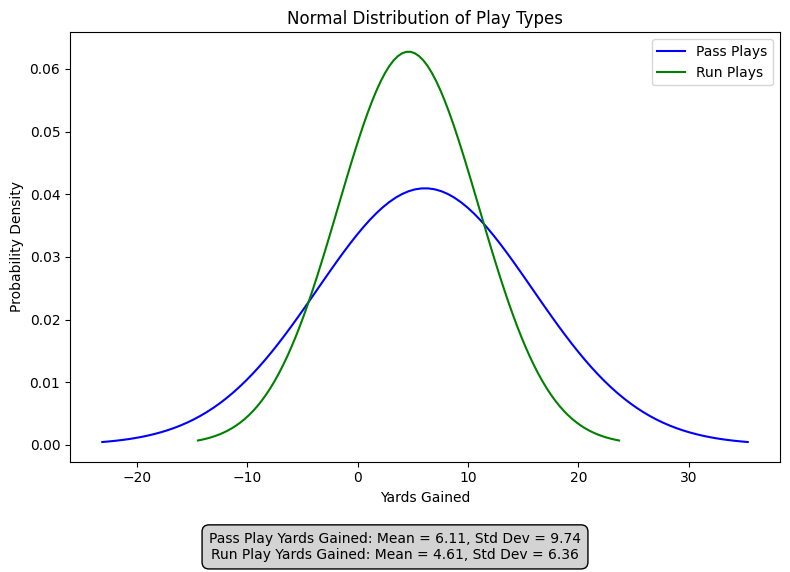

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Function to get mean and std dev for a given play type
def get_stats(play_type):
    mean = avg_stddev_and_med_yards_pp[avg_stddev_and_med_yards_pp['play_type'] == play_type]['avg_gain'].iloc[0]
    std_dev = avg_stddev_and_med_yards_pp[avg_stddev_and_med_yards_pp['play_type'] == play_type]['std_dev_gain'].iloc[0]
    return mean, std_dev

# Get stats for pass plays
pass_mean, pass_std_dev = get_stats('pass')

# Get stats for run plays
run_mean, run_std_dev = get_stats('run')

# Generate x values for both distributions
x_pass = np.linspace(pass_mean - 3*pass_std_dev, pass_mean + 3*pass_std_dev, 100)
x_run = np.linspace(run_mean - 3*run_std_dev, run_mean + 3*run_std_dev, 100)

# Calculate corresponding y values for normal distributions
y_pass = norm.pdf(x_pass, pass_mean, pass_std_dev)
y_run = norm.pdf(x_run, run_mean, run_std_dev)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot both normal distributions
ax.plot(x_pass, y_pass, label="Pass Plays", color='blue')
ax.plot(x_run, y_run, label="Run Plays", color='green')

# Formatting the plot
ax.set_title("Normal Distribution of Play Types")
ax.set_xlabel("Yards Gained")
ax.set_ylabel("Probability Density")
ax.legend()

# Add a textbox outside the plot (above the figure)
textstr = (f"Pass Play Yards Gained: Mean = {pass_mean:.2f}, Std Dev = {pass_std_dev:.2f}\n"
           f"Run Play Yards Gained: Mean = {run_mean:.2f}, Std Dev = {run_std_dev:.2f}")

# Use figure's `suptitle` to place the text outside the plot area
fig.suptitle(textstr, fontsize=10, x=0.5, y=-.02, ha='center', bbox=dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="lightgray"))

# Adjust layout to make room for the textbox
plt.tight_layout(rect=[0, 0, 1, 0.95])  

# Show the plot
plt.show()

In [49]:
# print('avg')
# avg_yds_ppp = nfl_play_by_play.groupby("play_type")["yards_gained"].mean().copy()
# display(avg_yds_ppp)


# print('std dev')
# stddev_yds_ppp = nfl_play_by_play.groupby("play_type")["yards_gained"].std().copy()
# display(stddev_yds_ppp)


## get the distribution of actual yardage gained in NFL games, calculate probability of said yardage based on pct of total outcomes
occurrence_yds_pp = nfl_play_by_play.groupby(["play_type", "yards_gained"]).size().reset_index(name="count").copy()
# display(occurrence_yds_pp[occurrence_yds_pp['play_type'] == 'run'])
# display(occurrence_yds_pp)

occurrence_yds_total_by_play_type = occurrence_yds_pp.groupby("play_type")["count"].sum().reset_index(name="total").copy()
# display(occurrence_yds_total_by_play_type)

yards_pp_and_tot_plays = occurrence_yds_pp.merge(occurrence_yds_total_by_play_type, how='left', on='play_type')
yards_pp_and_tot_plays['pct_of_total'] = yards_pp_and_tot_plays['count'] / yards_pp_and_tot_plays['total']
# display(yards_pp_and_tot_plays)


# limit yards per play to either run or pass 
yards_pp_and_tot_plays_run_and_pass = yards_pp_and_tot_plays[yards_pp_and_tot_plays['play_type'].isin(['pass','run'])].copy()
# yards_pp_and_tot_plays_run_and_pass.head(1)
yards_pp_and_tot_plays_run_and_pass[yards_pp_and_tot_plays_run_and_pass['yards_gained'] > 75]

,play_type,yards_gained,count,total,pct_of_total
95,pass,77.0,1,20393,0.000049
96,pass,78.0,1,20393,0.000049
97,pass,79.0,1,20393,0.000049
98,pass,81.0,1,20393,0.000049
99,pass,84.0,1,20393,0.000049
100,pass,98.0,1,20393,0.000049
190,run,79.0,1,15037,0.000067
191,run,81.0,1,15037,0.000067
192,run,86.0,1,15037,0.000067


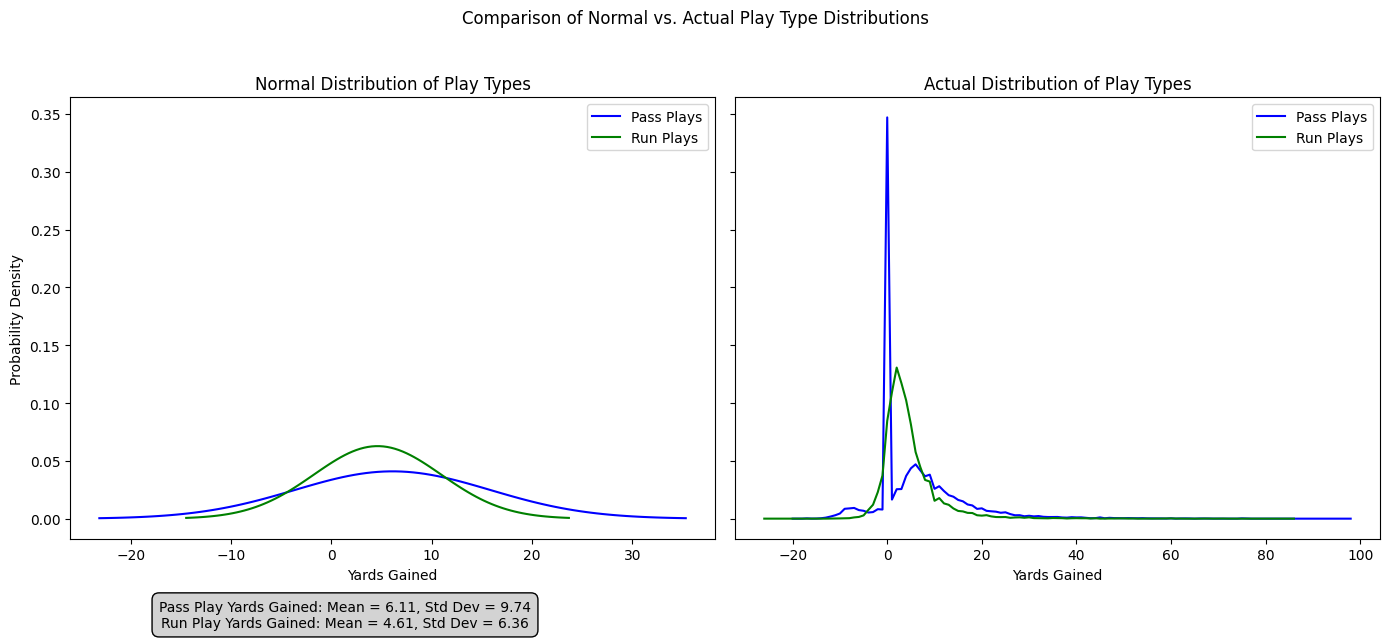

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Function to get mean and std dev for a given play type
def get_stats(play_type):
    mean = avg_stddev_and_med_yards_pp[avg_stddev_and_med_yards_pp['play_type'] == play_type]['avg_gain'].iloc[0]
    std_dev = avg_stddev_and_med_yards_pp[avg_stddev_and_med_yards_pp['play_type'] == play_type]['std_dev_gain'].iloc[0]
    return mean, std_dev

# Get stats for pass plays
pass_mean, pass_std_dev = get_stats('pass')
run_mean, run_std_dev = get_stats('run')

# Generate x values for both distributions
x_pass = np.linspace(pass_mean - 3*pass_std_dev, pass_mean + 3*pass_std_dev, 100)
x_run = np.linspace(run_mean - 3*run_std_dev, run_mean + 3*run_std_dev, 100)

# Calculate corresponding y values for normal distributions
y_pass = norm.pdf(x_pass, pass_mean, pass_std_dev)
y_run = norm.pdf(x_run, run_mean, run_std_dev)

# Create the figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# First plot - Normal distributions
axes[0].plot(x_pass, y_pass, label="Pass Plays", color='blue')
axes[0].plot(x_run, y_run, label="Run Plays", color='green')

# Formatting for first plot
axes[0].set_title("Normal Distribution of Play Types")
axes[0].set_xlabel("Yards Gained")
axes[0].set_ylabel("Probability Density")
axes[0].legend()

# Second plot - Actual distribution from df
for play_type, color in zip(['pass', 'run'], ['blue', 'green']):
    subset = yards_pp_and_tot_plays_run_and_pass[yards_pp_and_tot_plays_run_and_pass['play_type'] == play_type]
    axes[1].plot(subset['yards_gained'], subset['pct_of_total'], label=f"{play_type.capitalize()} Plays", color=color)

# Formatting for second plot
axes[1].set_title("Actual Distribution of Play Types")
axes[1].set_xlabel("Yards Gained")
axes[1].legend()

# Add a textbox outside the plots (below the figure)
textstr = (f"Pass Play Yards Gained: Mean = {pass_mean:.2f}, Std Dev = {pass_std_dev:.2f}\n"
           f"Run Play Yards Gained: Mean = {run_mean:.2f}, Std Dev = {run_std_dev:.2f}")

fig.suptitle("Comparison of Normal vs. Actual Play Type Distributions", fontsize=12)
fig.text(0.25, -0.05, textstr, fontsize=10, ha='center', bbox=dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="lightgray"))

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  

# Show the plots
plt.show()


# NFL QBs on average have a lower completion percentage, google said ~53%. data suggests 66 as there's 34% chance pass ends in 0 yards
# colleges have higher completion percentages 

## how to export this data? https://www.espn.com/college-football/stats/player/_/table/passing/sort/completions/dir/desc
- can be used to scale down the distribution of play types

## recreate this but more filter-able
- i dont give a shit if he averages 66 ypc when he's only got 1 catch

In [97]:
def get_yards_by_play_type_dist_of_outcomes(playtype):
    #### use NFL play by play data to create all possible yardage gained from run/pass play and the percentage of their outcome

    prob_df = yards_pp_and_tot_plays_run_and_pass[yards_pp_and_tot_plays_run_and_pass['play_type'] == playtype].copy()

    outcomes = prob_df['yards_gained'].tolist()
    probabilities = prob_df['pct_of_total'].tolist()
    return random.choices(outcomes, weights=probabilities,k=1)[0]

print(get_yards_by_play_type_dist_of_outcomes('pass'))

0.0


In [98]:
def choose_play_type(pct_run=.5):
    # choose whether run or pass is selected, uses pct run rate of your team to determine outcome
    pct_pass = 1 - pct_run

    outcomes = ['run','pass']
    probabilities = [pct_run, pct_pass]

    return random.choices(outcomes, weights=probabilities,k=1)[0]

percent_run_var = .9 
## how can i favor more positive runs to run heavy teams? if they are run heavy i assume they are good at running the ball
## should i also assume run heavy teams aren't as good at passing? such that their pass outcomes are skewed to the lower end. how much lower?
## use NFL data to group by teams' yardage, i.e. break down run/pass by NFL teams and see if the data shows any variance in teams that are more run/pass 

play_choice = choose_play_type(percent_run_var)
yards_outcome = get_yards_by_play_type_dist_of_outcomes(play_choice)
print(play_choice + ', yards gained: ' + str(yards_outcome))

run, yards gained: 3.0
